Logistic model for outcome of fight

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../CSV Files/df_ufc_masters_w_reversed.csv')

In [3]:
features = [
    'r_avg_sig_str_landed',
    'r_avg_sig_str_pct',
    'r_avg_sub_att',
    'r_avg_td_landed',
    'r_avg_td_pct',
    'r_height_cms',
    'r_reach_cms', 
    'r_age',
    'b_avg_sig_str_landed',
    'b_avg_sig_str_pct',
    'b_avg_sub_att',
    'b_avg_td_landed',
    'b_avg_td_pct',
    'b_height_cms',
    'b_reach_cms', 
    'b_age']

In [4]:
train_end_date = '2020-09-05'
test_start_date = '2020-09-06'
df_train = df[(df['date'] <= train_end_date)]
df_test = df[(df['date'] >= test_start_date)]
X_train =df_train[features]
y_train= df_train['winner']
X_test =df_test[features]
y_test= df_test['winner']

In [5]:
#X =df[features]
#y= df['winner']
#X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
y_train_encoded = y_train.apply(lambda x: 1 if x == 'Red' else 0)
y_test_encoded = y_test.apply(lambda x: 1 if x == 'Red' else 0)

In [7]:
model_lin = LogisticRegression()
model_lin.fit(X_train, y_train_encoded)

LogisticRegression()

In [8]:
y_pred_percent= model_lin.predict_proba(X_test)

In [9]:
#y_pred_percent = y_pred_proba * 100
y_pred_percent[:5]

array([[0.63675856, 0.36324144],
       [0.4698094 , 0.5301906 ],
       [0.45321066, 0.54678934],
       [0.39720378, 0.60279622],
       [0.39246526, 0.60753474]])

In [10]:
y_pred_proba_df = pd.DataFrame(y_pred_percent, columns=['Probability_Blue', 'Probability_Red'])

In [11]:
y_encoded_df = y_test_encoded.to_frame()
result_df = pd.concat([df_test, y_pred_proba_df], axis=1)

In [12]:
result_df.columns

Index(['r_fighter', 'b_fighter', 'r_odds', 'b_odds', 'r_ev', 'b_ev', 'date',
       'location', 'country', 'winner', 'title_bout', 'weight_class', 'gender',
       'no_of_rounds', 'b_current_lose_streak', 'b_current_win_streak',
       'b_draw', 'b_avg_sig_str_landed', 'b_avg_sig_str_pct', 'b_avg_sub_att',
       'b_avg_td_landed', 'b_avg_td_pct', 'b_longest_win_streak', 'b_losses',
       'b_total_rounds_fought', 'b_total_title_bouts',
       'b_win_by_decision_majority', 'b_win_by_decision_split',
       'b_win_by_decision_unanimous', 'b_win_by_submission',
       'b_win_by_tko_doctor_stoppage', 'b_wins', 'b_stance', 'b_height_cms',
       'b_reach_cms', 'b_weight_lbs', 'r_current_lose_streak',
       'r_current_win_streak', 'r_draw', 'r_avg_sig_str_landed',
       'r_avg_sig_str_pct', 'r_avg_sub_att', 'r_avg_td_landed', 'r_avg_td_pct',
       'r_longest_win_streak', 'r_losses', 'r_total_rounds_fought',
       'r_total_title_bouts', 'r_win_by_decision_majority',
       'r_win_by_deci

In [14]:
result_df['blue_difference'] = (result_df['Probability_Blue'] - result_df['b_odds'])
result_df['red_difference'] = (result_df['Probability_Red'] - result_df['r_odds'])
result_df=result_df.dropna()

In [15]:
result_df.columns

Index(['r_fighter', 'b_fighter', 'r_odds', 'b_odds', 'r_ev', 'b_ev', 'date',
       'location', 'country', 'winner', 'title_bout', 'weight_class', 'gender',
       'no_of_rounds', 'b_current_lose_streak', 'b_current_win_streak',
       'b_draw', 'b_avg_sig_str_landed', 'b_avg_sig_str_pct', 'b_avg_sub_att',
       'b_avg_td_landed', 'b_avg_td_pct', 'b_longest_win_streak', 'b_losses',
       'b_total_rounds_fought', 'b_total_title_bouts',
       'b_win_by_decision_majority', 'b_win_by_decision_split',
       'b_win_by_decision_unanimous', 'b_win_by_submission',
       'b_win_by_tko_doctor_stoppage', 'b_wins', 'b_stance', 'b_height_cms',
       'b_reach_cms', 'b_weight_lbs', 'r_current_lose_streak',
       'r_current_win_streak', 'r_draw', 'r_avg_sig_str_landed',
       'r_avg_sig_str_pct', 'r_avg_sub_att', 'r_avg_td_landed', 'r_avg_td_pct',
       'r_longest_win_streak', 'r_losses', 'r_total_rounds_fought',
       'r_total_title_bouts', 'r_win_by_decision_majority',
       'r_win_by_deci

In [16]:
condition_blue = ((result_df['b_ev'] * result_df['Probability_Blue']) > 100)
condition_red = ((result_df['r_ev'] * result_df['Probability_Red']) > 100)
condition_blue.sum()

18

In [18]:
bank=0
for index, row in result_df.iterrows():
    # Check if the condition for betting on blue is True
    if condition_blue[index]:
        # Simulate the bet
        bet_amount = 1  # You can adjust the bet amount based on your strategy
        
        # Check if blue won
        if row['winner'] == 'Blue':
            # Add the B_ev to the bank
            bank +=1
            #bank += row['B_ev'] * (bet_amount / 100)
        else:
            # Subtract the bet amount from the bank
            bank -= bet_amount
print(bank)

-14


In [19]:
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test_encoded, y_pred_test)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_test)
classification_rep = classification_report(y_test_encoded, y_pred_test)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5693
Confusion Matrix:
 [[304 230]
 [230 304]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       534
           1       0.57      0.57      0.57       534

    accuracy                           0.57      1068
   macro avg       0.57      0.57      0.57      1068
weighted avg       0.57      0.57      0.57      1068



Train accuracy: 0.5788629069234296
Train precsision: 0.5788629069234296
Train recall: 0.5788629069234296


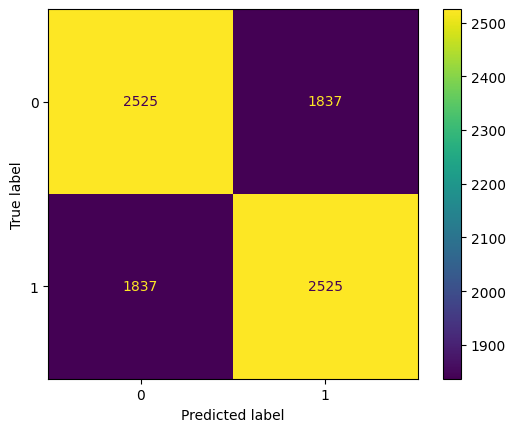

In [22]:
acc_train = accuracy_score(y_train_encoded, y_pred_train)
cm_train = confusion_matrix(y_train_encoded, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.5692883895131086
Test precsision: 0.5692883895131086
Test recall: 0.5692883895131086


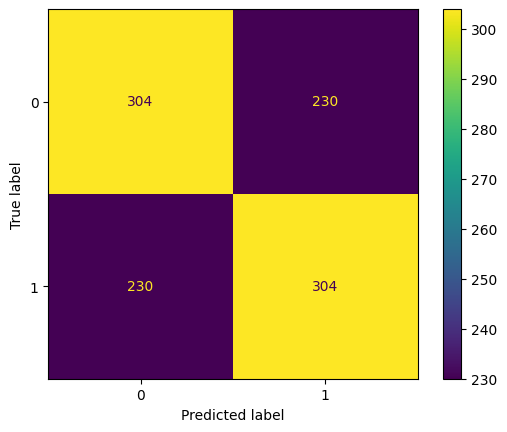

In [25]:
acc_test = accuracy_score(y_test_encoded, y_pred_test)
cm_test = confusion_matrix(y_test_encoded, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')